Semesterarbeit Teil 3, Programm 2 (Beat Kappert)
=================================

Das Programm erwartet die Eingabe einer Original-Funktion in SymPy Syntax. Das Programm versucht, illegale Eingaben abzufangen. Bei leerer Eingabe (CR) wird diese Beispiel-Funktion verwendet:

    x**3 - 3*x**2   

Die eingegebene Original-Funktion soll durch verschiedene Interpolationsvarianten angenähert werden.

Es werden 10 Stützpunkte im Intervall `[-5, 5]` bestimmt, die auf der Original-Funktion liegen. Die Stützpunkte bei x=-5 und x=5 gehören dazu. Die restlichen 8 sind gleichmässig dazwischen verteilt. (Es kommt die NumPy Funktion `r_` zum Einsatz, die für diese Zwecke wie ein schnelles `linspace` funktioniert.)

Mit den 10 Stützpunkten werden mit der SymPy Funktion `interp1d` Interpolationen gerechnet. Dies geschieht mit diesen Algorithmen:
- nearest
- zero
- slinear
- linear
- quadratic
- cubic

Gezeichnet wird:
- Die Stützpunkte als schwarze Kreise
- Die Original-Funktion
- Die 6 Interpolationen



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import sympy as sym
from sympy.core.sympify import SympifyError

In [5]:
x = sym.symbols('x')

input_incomplete = True
while input_incomplete:
    try:
        print("Use SymPy syntax: x-1, x*2, sqrt(x), exp(x), x**2, etc.")
        function_string = input(
            "Enter a function of x [x**3 - 3*x**2]: ").strip()
        if not function_string:
            function_string = 'x**3 - 3*x**2'
        function_sympy = sym.sympify(function_string)
        function_lambda = sym.lambdify(x, function_sympy, "numpy")
        input_incomplete = False
    except (AttributeError, SympifyError) as bad_input_error:
        print(bad_input_error)
        pass

Use SymPy syntax: x-1, x*2, sqrt(x), exp(x), x**2, etc.


Enter a function of x [x**3 - 3*x**2]:  exp(x)*2 - 0.9*x**3


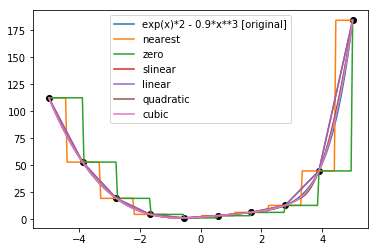

In [6]:
support_points_x = np.r_[-5:5:10j]
support_points_y = function_lambda(support_points_x)

# plot support points
plt.scatter(support_points_x, support_points_y, c="k")

x_axis = np.r_[-5:5:200j]

# plot original function
y_values = function_lambda(x_axis)
plt.plot(x_axis, y_values, label=function_string + " [original]")

# plot interpolated graphs
for kind in ['nearest', 'zero', 'slinear', 'linear', 'quadratic', 'cubic']:
    function_interpolated = interpolate.interp1d(
        support_points_x, support_points_y, kind=kind)
    y_values_interpolated = function_interpolated(x_axis)
    plt.plot(x_axis, y_values_interpolated, label=kind)

plt.legend()